# 13 Rate equations and Chemical Kinetics

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sympy import *
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## 13.1 Linear kinetic schemes

The equations of chemical kinetics can quite easily become complicated even with simple schemes. The sequential scheme 

$$\displaystyle A \overset{k_1}\longrightarrow B \overset{k_2}\longrightarrow C$$

is quite difficult to solve by direct integration of the equations involved, and if a reversible step is introduced, such as 

$$\displaystyle A \underset{k_{-1}}{\stackrel{k_1}{\leftrightharpoons}} B \overset{k_2} \longrightarrow C$$

then solving the rate equations becomes a difficult task. When performing transient kinetics experiments using, for instance, the stopped-flow, flash - photolysis, or femtosecond pump - probe methods, the time profiles of the species present have to be calculated, so that they can be fitted to data to obtain rate coefficients. The transient species present, such as B above, are identified both by their time profile and by spectra. 

A kinetic scheme is always written in terms of the rate of change of the species present; for example, the first-order decay of species $A$ is

$$\displaystyle \frac{dA}{dt}=-k_1 A$$

with rate constant $k_1$, which is in units of s$^{-1}$ is more properly called the _rate coefficient_.
Conventionally we write the concentration of species $A$ as $[A]$ but for clarity we use $A$. Note that $A$ is a function of time, this is implied in the equations but almost never explicitly written down, which means that we rarely need to write $A(t)$.

The first-order equation indicates that the rate of change of $A$ is negative; therefore, $A$ is decaying away and being changed into something else and it is doing so at a rate of $-k_1A\;\mathrm{ mol\,dm^{-3}\, s^{-1}}$. The rate at any time is thus proportional to how much of $A$ remains unreacted.

In the scheme,

$$\displaystyle \displaystyle A \overset{k_1}\longrightarrow B \overset{k_2}\longrightarrow C$$

as $A$ decays $B$ is formed at rate $k_1A$, and as this decays with rate $k_2B$, $C$ is formed. The whole
scheme is

$$\displaystyle \qquad\qquad\begin{align}\frac{dA}{dt}&=-k_1A\\ \frac{dB}{dt}&= k_1A-k_2B\\ \frac{dC}{dt}&= k_2B \end{align}\qquad\qquad\qquad\qquad\text{(35)}$$

In solving these differential equations the initial conditions must always be defined. This means defining the concentration of all possible species present in the reaction scheme at time zero. Often it is assumed that only some amount of $A$ present is present, say $A_0$, and that $B_0 = C_0 = 0$. You will notice that, since we cannot create or destroy atoms in a chemical process, the total amount of all species is constant at all time, so that $A_0 + B_0 + C_0 = A + B + C$, which means that C can always be calculated as the difference $C = A_0 + B_0 + C_0 - A - B$ so there are really only two differential equations. However, if $C$ decomposes with time to another species, we cannot use this last relationship.

We know from direct integration that $\displaystyle A = A_0e^{-k_1t}$, and from the theory of coupled linear differential equations that the solution in general for all species are _sums of exponential_ terms, see Chapter 10.7. If the initial concentration of $A = A_0$ and initially $B = C =0$, then the concentration of $B$ is

$$\displaystyle B(t)=\frac{k_1}{k_1-k_2}A_0\left(e^{-k_2t}-e^{-k_1t} \right) \qquad\tag{36}$$

which is of the form expected, with an exponential decay preceded by a grow-in, see Figure 55. Notice that $k_1$ cannot have the same value as $k_2$ as then the equation for the population would be $0/0$, which is undefined; but in fact there is no reason why these rate constants should not be equal, that is to say that $B$ is formed with the same rate constant as it decays. This special case is dealt with in Chapter 10.7(ii).

As an extension to this scheme, suppose that A has an extra form of decay and rather than just forming B it also forms D with a rate constant $k_3$. This might be another chemical species or if A is an excited state, then D could be the ground state and A has fluoresced. Either way the scheme is  

$$\displaystyle \displaystyle A \overset{k_1}\longrightarrow B \overset{k_2}\to C; \qquad A \overset{k_3}\longrightarrow D$$

and $\displaystyle \frac{dA}{dt}=-(k_1+k_3)A$ but B is unchanged as $\displaystyle \frac{dB}{dt}= k_1A - k_2B$. Notice that although $dB/dt$ is the same as in the scheme above B itself appears with rate constant $k_1+k_3$ which is the decay of A but only the fraction $k_1/(k_1+k_3)$ of A forms D. By inspecting the scheme, we can write down the decay of A and the appearance of D without any further calculation, giving

$$\displaystyle A = A_0e^{-(k_1+k_3)t},\quad D=\frac{k_3}{k_1+k_3}A_0\left(1-e^{-(k_1+k_3)t} \right)$$

which shows that D appears as A decays. The change in B has to be calculated, and as expected the result is similar to that of eqn 36, i.e replace $k_1$ with $k_1+k_3$,  and is 

$$\displaystyle B(t)=\frac{k_1}{k_1+k_3-k_2}A_0\left(e^{-(k_1+k_3)t}-e^{-k_2t} \right) $$

and which shows that B appears or 'grows-in' with the rate constant $k_1+k_3$, i.e. just with the rate constant that A decays.

The next section describes how this and many other complex schemes can be solved using matrix methods both algebraically and more often for complicated rate equations, numerically.

## 13.2 Matrix solutions. Master Equations.

Using matrix methods changes the way the problem is solved into that of finding eigenvalues and eigenvectors, thereby avoiding the difficulty of integration, but it is only applicable to first order or linear equations; i.e. product terms such as $k_2AB$ are not allowed. For very complex schemes, consisting of hundreds of equations, the Master Equation approach is used and is usually solved numerically. A master equation is defined as a phenomenological, first-order differential equation, describing the time evolution of the probability of a 'system' to occupy any one of a discrete set of states.

The matrix method is described first and justified in the next section. Returning to the sequential scheme 35, the three equations can be reproduced in matrix form as

$$\displaystyle \frac{d\pmb{M}}{dt}=\pmb{KM}$$
the solution of which is formally

$$\displaystyle \pmb{M}=\pmb{M_0}e^{-\pmb{K}t} \qquad\tag{37}$$

where $\pmb{M}$ is a column matrix of concentrations at time $t$, $\pmb{M}_0$ the matrix of their initial values, and $\pmb K$ is a square matrix of rate constants organised as in the rate equation. In the master Equation approach the rate equations 35 are rewritten in matrix form as

$$\displaystyle \qquad\qquad\begin{bmatrix} \displaystyle\frac{dA}{dt}\\ \displaystyle\frac{dB}{dt}\\ \displaystyle\frac{dC}{dt}\end{bmatrix} =\begin{bmatrix} -k_1 & 0 & 0\\ k_1 & -k_2 & 0\\0 & k_2 & 0\\\end{bmatrix}\begin{bmatrix}A\\B\\C \end{bmatrix} \qquad\qquad\qquad\qquad\text{(38)}$$

Notice how the decay rate constant of each species is on the diagonal, and the grow-in or decay of species $C$ from $B$ and $B$ from $A$, on the off-diagonal. The position of a row of  rate constants in the matrix is the same as in the rate equation for that species.  Notice also that the matrix is not Hermitian, i.e. is not symmetrical, although each term is real. This means that when the equation is solved the eigenvectors $x$ are not orthogonal. The next sections illustrate how the solution is determined.

### **(i) Secular Determinant**

Solving the matrix equation 37 is done in two steps. First the eigenvalues $\lambda$ are obtained from the secular determinant of the rate constants, then equation 39 is used to obtain the populations with time. The justification for this is given in the next section, 13.3; we use it first. The secular determinant of matrix $\pmb{k}$ is

$$\displaystyle \begin{vmatrix}-k_1-\lambda & 0 & 0\\ k_1& -k_2-\lambda & 0 \\ 0 & k_2 & -\lambda \end{vmatrix}=0$$

whose characteristic equation is $(k_1 + \lambda)(k_2 + \lambda)\lambda = 0$ and from which, by inspection, $λ_1 =-k_1,\; \lambda_2 =-k_2$,and $\lambda_3 =0$.

### **(ii) Time profiles**

To calculate the populations, or concentrations, using the Master equation approach the matrix equation

$$\displaystyle \pmb{M}(t)=\pmb{x}[\pmb{e}^{\lambda t}]\pmb{x}^{-1}\pmb{M}_0 \qquad\tag{39}$$

is used, see Similarity Transforms section 13.4. This produces a column vector $\pmb{M}(t)$ of the populations of each species at time $t$, $\pmb{M}_0$ being a column vector of the initial populations. The eigenvectors of matrix $\pmb{k}$ are formed into a (modal) matrix $\pmb{x}$ and $\pmb{x}^{-1}$ is its inverse. The exponential matrix is the diagonal matrix of the exponential of eigenvalues multiplied by time:

$$\displaystyle \qquad\qquad e^{\lambda t} =\begin{bmatrix} e^{\lambda_1 t} & 0 & 0 & \cdots \\ 0 & e^{\lambda_2 t}   & 0 & \cdots \\ 0 & 0 & e^{\lambda_3 t} & \cdots \\ \vdots & \vdots &\vdots & \ddots \end{bmatrix}\qquad\qquad\qquad\qquad \text{(40)}$$

which in this particular example is $\displaystyle e^{\lambda t} =\begin{bmatrix} e^{-k_1 t} & 0 & 0  \\ 0 & e^{-k_2 t}   & 0  \\ 0 & 0 & 1   \end{bmatrix} $

The whole equation is, in diagrammatic form,

$$\displaystyle \qquad\qquad 
\begin{bmatrix} M_1(t)\\ M_2(t)\\ \vdots \\ \vdots \end{bmatrix}=
\begin{bmatrix} x_{11} & x_{21}& \cdots & x_{n1}\\ x_{12} &\cdots & \cdots & \vdots  \\
\vdots & \vdots &\ddots &\vdots \\
\cdots & \cdots & \cdots & x_{nn}
\end{bmatrix} \begin{bmatrix} e^{\lambda_1 t} & 0 & 0 & \cdots \\ 0 & e^{\lambda_2 t}   & 0 & \cdots \\ 0 & 0 & e^{\lambda_3 t} & \cdots \\ \vdots & \vdots &\vdots & \ddots \end{bmatrix}\begin{bmatrix} x_{11} & x_{21}& \cdots & x_{n1}\\ x_{12} &\cdots & \cdots & \vdots  \\
\vdots & \vdots &\ddots &\vdots \\
\cdots & \cdots & \cdots & x_{nn}\end{bmatrix}^{\large{-1}}  \begin{bmatrix} M_{01}(t)\\ M_{02}(t)\\ \vdots \\ \vdots \end{bmatrix}\qquad\qquad\qquad\qquad \text{(41)}$$

where each eigenvector is a column in the $x$ matrix and the notation $k_{12}$ is the rate constant from species $1(a) \to 2(b)$ etc.  The populations of each species are the rows of the $\pmb{M}(t)$ column vector.

The calculation, using python/Sympy, is shown below. The solution is found algebraically but in practice for complex kinetic schemes a purely numerical solution is the way to proceed because algebraic solution become impossibly complex. Question 52 illustrates the Master Equation method for a complicated set of rate equations.

### **(iii) Algebraic solution of $A \to B \to C$**

It is assumed that the rate constants are $k_1$ and $k_2$, and that, at time zero, the amount of $A$ present $A_0 = 1$, and that $B_0 = C_0 = 0$; This code will calculate any $A \leftrightharpoons B \leftrightharpoons C$ when the $\pmb{k}$ matrix is modified.

In [25]:
# algorithm: Kinetic scheme A -> B -> C . Using sympy for algeric result

t, k1, k2, A0, B0, C0= symbols('t, k1, k2, A0, B0, C0')

k_matrix = Matrix([ [-k1,0,0],[k1,-k2,0],[0,k2,0]    ])  # set up matrix 
k_matrix

⎡-k₁   0   0⎤
⎢           ⎥
⎢k₁   -k₂  0⎥
⎢           ⎥
⎣ 0   k₂   0⎦

In [26]:
vec, val = k_matrix.diagonalize()        # returns eigenvectors and eigenvalues
vec,val                                  

⎛⎡   k₁ - k₂    ⎤               ⎞
⎜⎢0  ───────  0 ⎥               ⎟
⎜⎢      k₂      ⎥  ⎡0   0    0 ⎤⎟
⎜⎢              ⎥  ⎢           ⎥⎟
⎜⎢    -k₁       ⎥, ⎢0  -k₁   0 ⎥⎟
⎜⎢0   ────    -1⎥  ⎢           ⎥⎟
⎜⎢     k₂       ⎥  ⎣0   0   -k₂⎦⎟
⎜⎢              ⎥               ⎟
⎝⎣1     1     1 ⎦               ⎠

In [27]:
M0 = Matrix([[A0,0,0]])                  # Initial condition, only A is present in this example
exp_matrix = zeros(3,3)                  # make matrix full of zeros
for i in range(3):
    exp_matrix[i,i]= exp(val[i,i]*t)     # fill diagonals 

populations = vec * exp_matrix * vec.inv() * M0.transpose() 
populations

⎡                      -k₁⋅t      ⎤
⎢    -A₀⋅k₁⋅(k₁ - k₂)⋅ℯ           ⎥
⎢    ────────────────────────     ⎥
⎢           ⎛    2     ⎞          ⎥
⎢           ⎜  k₁      ⎟          ⎥
⎢        k₂⋅⎜- ─── + k₁⎟          ⎥
⎢           ⎝   k₂     ⎠          ⎥
⎢                                 ⎥
⎢   ⎛     2  -k₁⋅t         -k₂⋅t⎞ ⎥
⎢   ⎜   k₁ ⋅ℯ          k₁⋅ℯ     ⎟ ⎥
⎢A₀⋅⎜─────────────── + ─────────⎟ ⎥
⎢   ⎜   ⎛    2     ⎞    k₁ - k₂ ⎟ ⎥
⎢   ⎜   ⎜  k₁      ⎟            ⎟ ⎥
⎢   ⎜k₂⋅⎜- ─── + k₁⎟            ⎟ ⎥
⎢   ⎝   ⎝   k₂     ⎠            ⎠ ⎥
⎢                                 ⎥
⎢   ⎛      -k₁⋅t        -k₂⋅t    ⎞⎥
⎢   ⎜  k₁⋅ℯ         k₁⋅ℯ         ⎟⎥
⎢A₀⋅⎜- ────────── - ───────── + 1⎟⎥
⎢   ⎜      2         k₁ - k₂     ⎟⎥
⎢   ⎜    k₁                      ⎟⎥
⎢   ⎜  - ─── + k₁                ⎟⎥
⎣   ⎝     k₂                     ⎠⎦

The populations of the three species are shown in Fig. 7.55. Intuitively, they have the correct form: $ A$ decays to zero, $B$ rises and falls also to zero, and $C$ continuously rises to a constant value, which is $A_0$, as all molecules must eventually be converted into $C$. Notice, that even though $B$ decays with a rate constant greater than it forms, it is still possible to see the population of $B$. You might like to calculate this figure and compare it with that when $k_1$ and $k_2$ are swapped in value.

![Drawing](matrices-fig55.png)

Figure 55. Populations of species $A, \;B$, and $C$ with time when $k_1 = 1,\; k_2 = 1.5$ with initial concentrations $A_0 =1,\;B_0 =C_0 =0$. The scheme is $\displaystyle A \overset{k_1}\longrightarrow B \overset{k_2}\longrightarrow C$.
________

### **(iv) Numerical solution of $A \leftrightharpoons B \leftrightharpoons C$ using the Master Equation** 

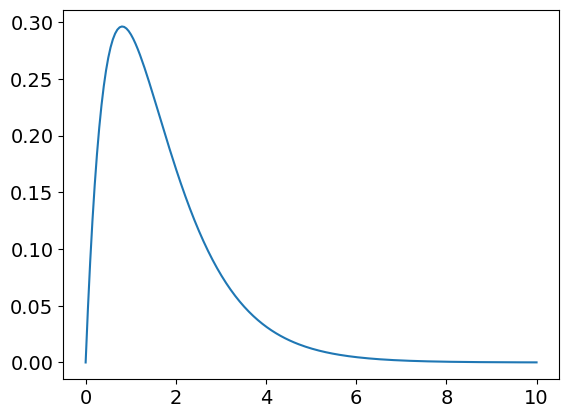

In [28]:
# Master Equation numerical calculation using python/numpy

max_num = 200
t  = np.linspace(0,10,max_num)    # range 0 to 10, 200 points 
M0 = np.array([1,0,0])            # initial concentrations, only A is present in this example
n  = 3                            # number of equations
k1 = 1.0                          # rate constnat
k2 = 1.5
M = np.array([ [-k1,0,0], [k1,-k2,0], [0,k2,0]    ])   # rate constant matrix

val,vec = LA.eig(M)              # eigenvalues;  eigenvectors
#print('eigenval, eigenvec', val,'\n', vec)

iv_vec = LA.inv(vec)                       # invert once and save 
f01 = lambda m,k: np.exp( val[m]*t[k] )    # define diagonal in matrix 
exp_mat = np.zeros((n,n),dtype=float)      # define matrix 

pop = np.zeros((n,max_num),dtype=float)    # define 2D array for results 

for i in range(max_num):
    for j in range(n):
        exp_mat[j,j] = f01(j,i)
    pop[:,i]= vec @ exp_mat @ iv_vec @ M0  # multiply, pop is all species at time t[i]

plt.plot(t[:],pop[1,:])                    # species B
plt.show()

Plotting the three curves of pop[...] will produce figure 55.
____________

### **(v) Circular reaction scheme**

When the rate equations are more complex then a numerical solution is to be preferred simply because the equations can become impossibly complex. Consider a scheme (figure 55a) in which three species A, B, C are interconnected each with the others. We can see that equilibrium will be established for all three species as there is no pathway for any species to react other than to the others. We can also guess at the concentration vs time if only one species is populated initially, which is that this species decays and the others increase until equilibrium is reached.

![Drawing](matrices-fig55a.png)

Figure 55a. Coupled kinetic scheme.
_____
The rate equations are

$$\displaystyle \begin{align} \frac{da}{dt}&= -(k_{12}+k_{13})a+k_{21}b+k_{31}c  \\ \frac{db}{dt}&= k_{12}a-(k_{21}+k_{23})b+k_{32}c \\\frac{dc}{dt}&= k_{13}a + k_{23}b-(k_{31}+k_{32})c \end{align} $$

where $a,b,c$ are the concentrations of each species and $k_{21}$ is the rate constant from $b \to a$ and similarly for the others. In matrix form these equations are, where the dot over a letter indicated the time derivative, 

$$\displaystyle \begin{bmatrix}\dot a\\ \dot b\\ \dot c \end{bmatrix}=\begin{bmatrix}-(k_{12}+k_{13}) & k_{21} & k_{31}\\k_{12} & -(k_{21}+k_{23}) & k_{32} \\k_{13} & k_{23} & -(k_{32}+k_{31})  \\ \end{bmatrix}\begin{bmatrix}a\\b\\c\end{bmatrix}$$

The rate expression for $b$ is $\displaystyle \frac{db}{dt}=  k_{12}a -(k_{21}+k_{23})b +k_{32}c$

and in general this can be written as

$$\displaystyle \frac{db}{dt}= k_{12}a -\sum_i k_{2,i}(1-\delta_{2,i})b +k_{32}c$$

where the delta function removes the $k_{22}$ term. The summation is along the last index, i.e. the columns of the (rate constant) matrix of $k_{i,j}$ values in each case. Note that this $k$ matrix is simply the matrix of rate constants  and not organized as rate equations as $\pmb K$ is in eqn. 37. This means that the subscripts refer to the rate constants not to their index position in the matrix. As a check on the calculation the sum of the populations at any time must be equal to the total amount initially present.

This matrix method can be extended to schemes with many other species as in question 52. If, for instance, species $b$ decays such as by fluorescence or phosphorescence then $-k_f b$ is added to the summation term in the rate equation for that species. The limitation is that only first order, or pseudo first order, reactions are possible, i.e. the rate constant matrix must not involve and concentrations unless they have a constant value.

### **(vi) Steady State**

In this particular scheme each species will soon reach the steady state, which is here equivalent to equilibrium, when the rate of change of concentration becomes zero. This happens because we have not included a process by which the total population can decrease, for example, by any one species reacting to a different molecule other than A, B or C. 

The rate equations become 

$$\displaystyle \begin{align} \frac{da}{dt}&= -(k_{12}+k_{13})a+k_{21}b+k_{31}c=0  \\ \frac{db}{dt}&= k_{12}a-(k_{21}+k_{23})b+k_{32}c =0\\\frac{dc}{dt}&= k_{13}a + k_{23}b-(k_{31}+k_{32})c =0\end{align} $$

but solving these equations only produces the ratio of concentrations because the species are linked and not independent unless the mass balance $a+b+c=c_{tot}$ is also included then individual concentrations can be obtained. The mass balance is true at any time including time zero. The ratio between A and C at equilibrium is 

$$\displaystyle \frac{a}{c}=\frac{ k_{21} k_{31} + k_{21} k_{32} + k_{23} k_{31}}{k_{12} k_{23} + k_{13} k_{21} + k_{13} k_{23}}$$

### **(vii) Energy transfer on a Polygon. Circulant determinants**

In this example we consider energy transfer between molecules equally spaced apart on a polygon. The determinant produced is similar to the $\mathrm{H\overset{\cdot\cdot}uckel }$ one described in section 2 although the problem is totally different.

Forster transfer, which operates by dipole-dipole energy transfer, is commonly used as a spectroscopic ruler to determine distances between molecules tagged with fluorophores. The process between donor and acceptor is 

$$\mathrm{ D^* + A \to D + A^*}$$

where the * indicates an electronically excited molecule. In fact the donor and acceptor can be the same type of molecule, e.g. chlorophyll among many others, when there is overlap of absorption and emission spectra. The overlap ensures that some energy levels of the donor are above those of the acceptor. Various very similar types of chlorohyll are the chromophores used the first step in the light gathering process of the 'antenna' in photosynthesis. The LH2 and LH1 light harvesting antenna of bacterial photosynthesis has 18 or so chromophores arranged in a loop, which could be described as a regular polygon perhaps just as accurately as a circle. (The energy is now understood to be localised over the antenna for the first few tens of femtoseconds after photon absorption but here for the purposes of example in this idealised model, we shall suppose that discrete transfer between pigments always occurs.)

The rate constant is defined as 

$$\displaystyle k =\chi^2 k_f\left(\frac{r}{R_0}\right)^6$$

where $k_f$ is the intrinsic excited state decay rate constant and $R_0$ is a characteristic distance that depends on the overlap of the donor molecule's emission spectrum and the acceptor's absorption spectrum and is typically only a few nanometres. The orientation factor between the molecules dipoles is $\chi^2$. The molecules' separation is $r$ which, for Forster transfer to be valid, must be much greater than a molecule's radius.

If molecules are placed at the vertices of a regular polygon a set of first order rate equations can be written down to define the probability of finding excitation on any molecule at any given time. If the molecules are all of the same type and orientation, only one rate constant $k$ is needed. As time passes the excitation spreads out among all the molecules and if we suppose that the intrinsic decay rate constant (reciprocal fluorescence or excited state lifetime) is far smaller than that for energy transfer the population will come to an equilibrium value with equal excitation on each molecule. For simplicity the normal decay of the excited state is ignored.

Suppose that the molecules are on the corners of a square and for simplicity only near-neighbour transfer is allowed, then the rate equations are

$$\displaystyle \qquad\qquad\begin{bmatrix}\dot p_0\\ \dot p_1\\ \dot p_2\\ \dot p_3 \end{bmatrix}=\begin{bmatrix} -2k & k & 0  & k \\ k & -2k & k & 0 \\0& k & -2k & k \\k & 0 & k & -2k\end{bmatrix}\begin{bmatrix}p_0(0)\\p_1(0)\\  p_2(0)\\ p_3(0) \end{bmatrix} \qquad\qquad\begin{matrix}  0 &\cdots & 1\\ \vdots & &\vdots\\ 3 &\cdots& 2\end{matrix}\qquad\qquad\qquad\qquad\text{(41a)}$$

The initial amounts excited are $p_i(0)$ where $i=0,\cdots, 3$ which we make zero except for $p_0(0)=1$. The first equation when written out in the usual way is  

$$\displaystyle \frac{dp_0(t)}{dt}= -k_{0\to 1}-k_{0\to 3} + k_{1\to 0} +k_{3\to  0}$$

which means that species 0 decays to species 1 and 3 with a rate constant $k$ and receives energy from species 1 and 3 each with rate constant $k$. Molecule 2 is not involved as it is not a near neighbour to molecule 0. All the rate constants are the same because we choose only to consider nearest neighbours and the molecules are equally spaced from one another.

To solve these equations we can use the method outlined with the $\mathrm{H\overset{\cdot\cdot}uckel }$ determinant with which this has great similarity. The determinant to solve for the characteristic equation is 

$$\displaystyle \begin{vmatrix} -2k & k & 0  & k \\ k & -2k & k & 0 \\0& k & -2k & k \\k & 0 & k & -2k\end{vmatrix}$$

and has a special form as it is *circulant*, which is to say that each row is the same as the others but rotated by one place, additionally each diagonal contains the same entry. $\mathrm{H\overset{\cdot\cdot}uckel }$ determinants on benzene or other planar rings has the same form as this. 

If $\lambda$ are the roots of the polynomial represented by the determinant then we write down the secular equation as

$$\displaystyle \begin{vmatrix} -2k-\lambda & k & 0  & k \\ k & -2k-\lambda & k & 0 \\0& k & -2k-\lambda & k \\k & 0 & k & -2k-\lambda\end{vmatrix}=0$$

and solve for $\lambda$ using the polynomial formed by expanding the determinant. Only because the determinant is circulant can we write down the solution directly, but first it helps to make a simple simplification as was done with Huckel determinants. This is to divide each term with $k$ and let 

$$\displaystyle x=-2-\lambda /k$$ 

and then the determinant becomes

$$\displaystyle \begin{vmatrix} x & 1 & 0  & 1 \\ 1 & x & 1 & 0 \\0& 1 & x & 1 \\1 & 0 & 1 & x\end{vmatrix}=0$$

As this determinant is quite small it is possible to expand it out by hand to form a polynomial, but of course this becomes virtually impossible for larger determinants and finding the roots even harder. This determinant, and other circulant ones,  is solved in section 2.5 where the Huckel method is described. Using the results from that section the four roots are $\displaystyle x_j= -2\cos(2\pi j/4)$ or $x=-2,0,2,0$ and thus substituting for $x$ the eigenvalues are

$$\displaystyle \lambda_j = -2k\left(1-\cos\left(\frac{2\pi j}{4}\right)\right),\qquad j=0,1,2,3$$

or

$$\displaystyle \lambda= 0,-2k,-4k,-2k$$

In the general case when there are $n$ coupled molecules the eigenvalues are

$$\displaystyle \lambda_j = -2k\left(1-\cos\left(\frac{2\pi j}{n}\right)\right),\qquad j=0,1,2,\cdots, n-1$$

The eigenvectors $v_j,\;(j=0,1,2,\cdots n-1)$ for circulant matrices/determinants are always the list of the powers of the $n$ roots of unity, 

$$\displaystyle v_j=\begin{bmatrix} w_j^0& w_j^1&w_j^2& \cdots &w_j^{n-1} \end{bmatrix}^T$$

and are in our example

$$\displaystyle \begin{array}{lll}v_0=\begin{bmatrix} 1 & 1&1&1 \end{bmatrix}^T,& v_1=\begin{bmatrix} 1 & i&-1&-i \end{bmatrix}^T,\\ v_2=\begin{bmatrix} 1 & -1&1&-1 \end{bmatrix}^T,& v_3=\begin{bmatrix} 1 & -i&-1&i \end{bmatrix}^T.\end{array}$$

The vectors are labelled as transpose $[\cdots]^T$ because they are column vectors. To evaluate the time profiles the matrix of eigenvectors $\pmb x$ (eqn 39) is needed, and in the case of circulant matrices because the values are each one of the roots of units $w$ so these values are repetative and can be written down directly. The elements are 

$$\displaystyle x_{j,k}=w_n^{j\cdot k}=e^{2\pi i\cdot j\cdot k/n},\quad j=0,1,2,\cdots,n-1,\quad k=0,1,2,\cdots,n-1$$ 

Each eigenvector is one column. Written out $\pmb x$ is  

$$\displaystyle \pmb x_n=\begin{bmatrix}1 & 1& 1& 1&\cdots\\1& w_n^1 & w_n^2 & w_n^3&\cdots \\1 & w_n^2 & w_n^4 & w_n^6 &\cdots \\1 & w_n^3 & w_n^6 & w_n^9&\cdots \\  \vdots & & &\vdots\\1 & w_n^{(n-1)k} & & & w_n^{(n-1)^2}\end{bmatrix}$$ 

and as $e^0 = 1$ the entries in the first row and column are always $1$. The maximum product $jk=(n-1)^2$. In our example

$$\displaystyle \pmb x_4=\begin{bmatrix}1 & 1& 1& 1\\1& i & -1 & -i \\1 & -1 & 1 & -1 \\1 & -i & -1 & i\end{bmatrix}$$ 

which means that we have all the information to calculate the populations on any molecule. The inverse of this type of eigenvector matrix is simply $\pmb x^*/n$, where * indicates the complex conjugate, so no calculation is required. The diagonal matrix is $[e^{\lambda t}]$ with the $\lambda$ given above and the whole calculation e.g. eqn 39 is 

$$\displaystyle \pmb x_t=\frac{1}{n}\pmb x[e^{\lambda t}]\pmb x^*\pmb M_0 $$ 

Although the eigenvector matrix $\pmb x$ is useful here, this is nothing compared to its general use which is that if $\vec v$ is any vector then multiplying as $\pmb x \vec v$ is the Discrete Fourier Transform (DFT) of vector $v$. This leads automatically to the Fast Fourier Transform (FFT) algorithms used universally in all sorts of signal analysis from music to CT scans. These are described in the Chapter 9 on Fourier Series and Transforms.

Before doing the calculation there is an important feature about the time profiles we already know. The $\lambda$ are scaled rate constants, i.e. they are the rate constant $k$ multiplied by a negative number. When $j=0, \lambda = -2k(1-\cos(0))$ which is zero meaning that there is always a constant term in the population $p$ because $e^0 = 1$ indicating that equilibrium will always be reached when the other terms have decayed away. (We are ignoring here the fact that the molecules themselves can decay by fluorescence, intersystem crossing or internal conversion but we shall assume that an excited state is long lived compared to energy transfer and so is effectively infinitely long lived). We also know that the time profiles have the form 

$$\displaystyle p(t)=\frac{1}{n}\sum_{m=0}^{n-1}c_me^{+\lambda_m\,t}$$

i.e. the sum/difference of exponential terms where $c$ are the coefficients for each term. In the circulant matrices the $c$'s are always $\pm 1$ and the $1/n$ makes the initial population at time zero equal to $1$ and the final population of all species $1/n$ when the energy is evenly spread out. 

The calculation in python is shown below for the general case. The number of molecules is $6$ and this shows that the population of $1$ and $5$ are equivalent and both rise and then fall as energy passes through them and that molecules further away from that one initially excited (molecule 0) take longer to reach equilibrium. If you try this with larger $n$ you will see this behaviour is general and in line with what intuition would suggest.

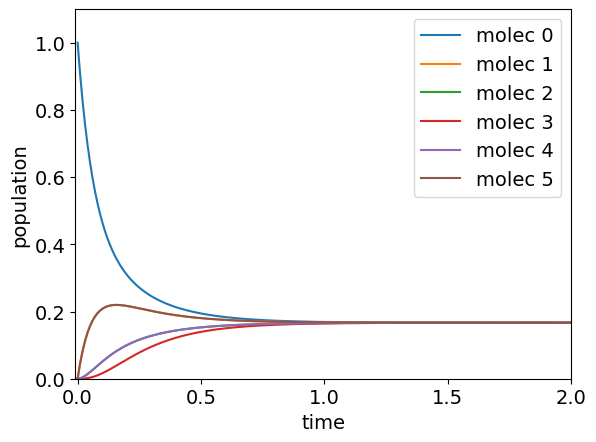

In [29]:
# Calculation of time profile when the secular equation is circulant

n  = 6         # number of molecules on the ring/ polygon
max_num = 200  # number of time points
maxt = 2       # maximum time

t   = np.linspace(0,maxt,max_num)      # time range 0 to maxt, max_num points 
M0  = np.zeros(n,dtype = complex)      # initial concentrations
lam = np.zeros(n,dtype = complex)      # vector for eigenvalues
X   = np.zeros((n,n),dtype = complex)  # matrix for eigenvectors
exp_mat = np.zeros((n,n),dtype = complex)         # define matrix for exp(lambda)
pop     = np.zeros((n,max_num),dtype=complex)     # define 2D array for results initially zero

M0[0] = 1.0 # initial population
k = 1.0     # rate constant

for j in range(n):                      # calculate eigenvectors (X) and eigenvalues (lam)
    lam[j] = -2*k*(1-np.cos(2*np.pi*j/n))
    for k in range(n):
        X[j,k] = np.exp(2*np.pi*1j*j*k/n)

iv_X = np.conj(X)/n       # could use LA.inv(X) but not necessary if circulant, invert once and save 

for i in range(max_num):
    for j in range(n):
        exp_mat[j,j] = np.exp( lam[j]*t[i] ) # diagonal  lambda*t   
    pop[:,i]= X @ exp_mat @ iv_X @ M0        # @ multiplies matrices, result is all species at time t[i]
    pass
for i in range(n):
    plt.plot( t[:],np.real(pop[i,:]) ,label='molec '+str(i))   # plot only real part                   

plt.ylim([0,1.1])
plt.xlim([-0.01,maxt])
plt.ylabel('population')
plt.xlabel('time')
plt.legend()
plt.show()

## 13.3 Justification for the matrix method to solve coupled linear differential equations

In using equation 38 to solve the scheme, the assumption is made that if $\pmb{M}$ is a vector and $\pmb{k}$ a matrix, we can write $d\pmb{M}/dt = \pmb{kM}$ and that its solution is $\pmb{M} = \pmb{M}_0e^{\pmb{k}t}$. To show that this is valid, we work backwards and start with $\pmb{M}$, which is differentiated term by term, after first expanding the exponential as a series. In Section 5.5 it was shown that the exponential of a matrix can only be manipulated by first expanding;

$$\displaystyle \frac{d\pmb{M}}{dt}=\pmb{M_0}\frac{e^{\pmb{k}t}}{dt}=\pmb{M_0}\frac{d}{dt}\left(1+\pmb{k}t+\frac{\pmb{k}^2}{2!}t^2++\frac{\pmb{k}^3}{3!}t^3+\cdots \right)\\=
\pmb{M_0}\pmb{k}\left(1+\pmb{k}t +\frac{\pmb{k}^2}{2!}t^2+\cdots \right) =\pmb{kM_0}e^{\pmb{k}t}=\pmb{kM}$$

In the last two steps, $\pmb{k}$ has been separated out, and the remaining series identified as the first few terms of the exponential expansion.

The second equation, (39), used in the calculation, is 

$$\displaystyle \pmb{M}(t) = \pmb{X}[e^{\lambda t}]\pmb{X}^{-1}\pmb{M}_0$$

and the form of this needs explaining. First, each value in the column vector $\pmb{M}(t)$ represents the concentration of each species at time $t$, the column vector $\pmb{M}_0$ holds the initial concentrations
of the same species. The equation we start with is $\pmb{M}(t) = \pmb{M}_0 e^{-\pmb{k}t}$. To solve this it has to be converted into $\pmb{M}(t) = \pmb{X}[e^{\lambda t}]\pmb{X}^{-1}\pmb{M}_0$, and to do this a _similarity transform_ is needed.

## 13.4 Matrix solutions. Markov Chains and Chemical Kinetics

A Markov chain is a stochastic process for predicting future behaviour based solely on the present state. These predictions are just as good as the ones that could be made knowing the process's previous history. The 'process' can be one of a number of very diverse types, a sequence of chemical reactions, diffusion on a line, the 'drunkard's walk', behaviour of the stock market, games such as 'snakes and ladders', the 'gambler's ruin' or how a company competes for sales with rivals. What is required is that the transition from one position to each of the others has a certain probability and as time progresses these probabilities are entered into a transition or transfer matrix and used to predict the future state. All that is needed is a starting state and the transition matrix to be able to predict all future behaviour. 

The way a process is written down is similar to the way we do this for a chemical reaction, except that probabilities rather than rate constants connect states and that a 'do nothing' or waiting probability is added to each species. The next figure gives an example of a three state system similar to that in fig 55a above. 

![Drawing](matrices-fig55b.png)

figure 55b. A scheme between three sites written as a Markov process.
______________________________

The figure gives the probabilities of transfer from one site $i$ to another $j$ as $p_{i,j}$ and the probability of remaining on a given site (or molecule) is $p_{ii}$ although this is not included in any chemical rate equation it has to be in this method. In the simple Markov process the probabilities belonging to any 'site', such as a product made by a company, always add up to $1$ as something happens even if it just that the site remains unchanged, i.e. $p_{11}+p_{12}=1,\; p_{12}+p_{22}+p_{23}=1$, etc. these probabilities are, of course always positive, $0 \le p\le 1$ , and we will initially assume that they are constant in time. If a state has only a probability of reaching it and none that leave, this is called and 'absorbing' site, and eventually all the population will end up here; for example in the process $A \overset{p_{12}}{ \underset{ p_{21}}  \rightleftharpoons} B\to C $, $C$ is an absorbing site, or in chemical terms, the product. If the process describes chemical reactions then the situation is more complex and it is necessary to consider how to calculate the probabilities when first, second or third order reactions occur. 

The initial state is defined, as a vector of populations or number of items held at each site etc., for example if only A is present initially as $A_0$ then the row matrix of initial values is 

$$\displaystyle P_0=\begin{bmatrix}A_0,0,0\end{bmatrix}$$

and to evaluate what has changed at the next time step $t+\tau$ where $\tau$ is a small time increment, and $t$ is some arbitrary start time which could be zero, we use the transition matrix $T$ as

$$\displaystyle P(t+\tau) = P_0\pmb T$$

where each *row* in the transfer matrix contains all the probabilities for that site, for example in fig 55b,

$$\displaystyle T=\begin{bmatrix}p_{11}& p_{12}&0\\p_{21} & p_{22} & p_{23}\\ p_{31}& 0 & p_{33} \end{bmatrix}$$

and because the probabilities in each row add to unity we can write in this case

$$\displaystyle T=\begin{bmatrix}1-p_{12}& p_{12}&0\\p_{21} &1 - p_{21}-p_{23} & p_{23}\\p_{31}& 0 & 1 - p_{31} \end{bmatrix}$$

so that only the transition probabilities between species are needed. The next time step is

$$\displaystyle P(t+2\tau)=P(t+\tau)\pmb T= p_0 \pmb T^2$$

and generalising to $n$ time steps 

$$\displaystyle P(t+n\tau) = p_0 \pmb T^n$$

so it is necessary to either evaluate in a recursive way or calculate the $n^{th}$ power of the transfer matrix.  This equation can also be written using column vectors, which is much more familiar in chemistry, and then the matrix has to be transposed and the vectors $P$ are now become column vectors, i.e.

$$\displaystyle P(t+n\tau) =  (\pmb{T}^T)^n P_0$$

where superscript $T$ indicates the transpose operation and we shall now always use column vectors in any calculations. The matrix can be raised to an integer power using the Similarity Transform described below, section 13.5.  The time $t$ is taken to be zero in all further calculations.

### **(i) A first order reaction $A \overset{k_{12}}{ \underset{ k_{21}}  \rightleftharpoons} B$**

If the reaction is $\displaystyle A \overset{k_{12}}{ \underset{ k_{21}}  \rightleftharpoons} B$ the transition matrix is 

$$\displaystyle \pmb T=\begin{bmatrix}1-k_{12}\tau & k_{12}\tau\\ k_{21}\tau & 1-k_{21}\tau \end{bmatrix} $$

where $\tau$ is a small time-step used to convert the rate constants into probabilities with values $0\le k\tau\le 1$. If the largest rate constant is $10^8$/s then $\tau$ could be $\sim 10^{-9}$ s thus making $k\tau$ less than unity and also dimensionless. In the case of chemical reactions this is important in another way since the time that a molecule exists before it reacts is not constant in time but exponentially distributed, i.e. as $e^{-kt}$ and when this is expanded at small times with $t=\tau$ then on expanding as a series $e^{-k\tau} \approx 1-k\tau$ which is now a constant and so small that any further terms are so small as to be insignificant.

If only the state A is initially populated the vector is $P_0=\begin{bmatrix} 1, 0\end{bmatrix}^T$. Choosing $k_{12}=4\cdot10^7, k_{21}=5\cdot10^6$ and $\tau=10^{-9}$ then in units of time $\tau$ 

$$\displaystyle P(1)=\begin{bmatrix}1-0.4 & 0.4\\ 0.05 & 1-0.05 \end{bmatrix}^T\begin{bmatrix}1 \\  0\end{bmatrix}=\begin{bmatrix}1-0.4 & 0.05\\ 0.4 & 1-0.05 \end{bmatrix}\begin{bmatrix}1 \\ 0 \end{bmatrix}=\begin{bmatrix}0.6\\0.4\end{bmatrix}$$

Using this result we can calculate the  populations at multiples of time $\tau$ and is done by recursively calculating at times $\tau, 2\tau\cdots$ or by using a Similarity Transform (see section 13.5) to raise the $T$ matrix to powers $2, 3,\cdots$ to get any particular time without calculating all the others. 

The calculation starts as,

$$\displaystyle P(0)=\begin{bmatrix}1\\0\end{bmatrix},\qquad P(1)= \begin{bmatrix}0.6\\0.4\end{bmatrix},\qquad P(2)=\begin{bmatrix}0.6 & 0.05\\ 0.4 & 0.95 \end{bmatrix}\begin{bmatrix}0.6 \\ 0.4 \end{bmatrix}=\begin{bmatrix}0.38\\0.62\end{bmatrix}\cdots\text{etc.} $$

and this is shown next.

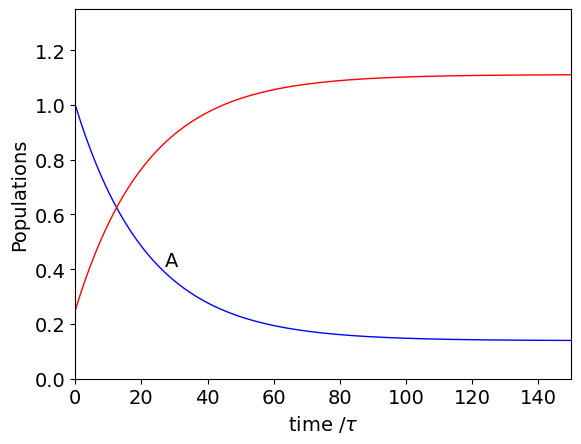

In [30]:
tau = 1e-9                 # set time to make rateconsstants into probabilities
k12 = 4e7*tau              # choose some rate constants
k21 = 5e6*tau              

TT = np.array([[ 1 - k12, k12 ],[ k21, 1 - k21 ] ] )  #  transfer matrix
T  = np.transpose(TT)
p  = np.array([1,0.25])                               # initial values of A and B

#evals,evecs = LA.eig(T)           # get eigenvecs for equilib amount
#plt.axhline((A[0]+B[0])*evecs[0,1]/(evecs[0,1]+evecs[1,1]),linewidth=0.5,color='grey') # plot long time A

n = 150                           # number of points
A = np.zeros(n,dtype=float)       # array to hold calculated values
B = np.zeros(n,dtype=float)
A[0] = p[0]                       # initial values
B[0] = p[1]
t = np.linspace(0,n,n)            # time steps
for i in range(1,n,1):
    temp = T @ p                  # @ is matrix multiply
    A[i] = temp[0]                # save values
    B[i] = temp[1]
    p = temp                      # ready for next step
    pass

plt.plot(t, A, color='blue',linewidth=1)
plt.plot(t, B, color='red',linewidth=1)
plt.xlim([0,n])
plt.ylim([0,A[0]+B[0]+0.1])
plt.ylabel('Populations')
plt.xlabel('time /'+r'$\tau$')
plt.text(27, A[25],'A')
plt.show()

It is clear even before doing the calculation that $A \overset{k_{12}}{ \underset{ k_{21}}  \rightleftharpoons} B$ will come to a steady state at sufficiently long time. This can be found by assuming that $P_\infty=\pmb T^TP_\infty$ which is in effect an eigenvalue-eigenvector equation with eigenvalues $E=[1,1]^T$ of unity, $\pmb T^TP_\infty=EP_{\infty}$. The normalised eigenvectors are obtained from matrix $T$ and are calculated as

In [31]:
f01 = np.array([[0.25,0.05],[0.75,0.95]])
evals,evecs = LA.eig(T)
evecs

array([[-0.70710678, -0.12403473],
       [ 0.70710678, -0.99227788]])

The first eigenvector adds to zero and is ignored, the second is $[v_a,v_B]^T=[0.1240, 0.9923]^T$ and the signs can be ignored as they are both the same. The long time concentration of A and B are the fractions of the total amount,

$$\displaystyle A_\infty=(A_0+B_0)\frac{v_a}{(v_a+v_b)}=0.896,\qquad B_\infty=(A_0+B_0)\frac{v_b}{(v_a+v_b)}$$ 

otherwise B is easily found since $A_0+B_0=A_\infty+B_\infty$.

### **(ii) A second order reaction $A +B \overset{k_{12}}{ \underset{ k_{21}}  \rightleftharpoons} C$**

A bimolecular reaction can be considered as a sequence of instantaneous first-order processes when the time intervals are very small meaning that the first-order rate that A decays by during time interval $\tau$ is $k_{12}[B]$ and so the probability that it remains unchanged is $1-k_{12}\tau [B]$. The transition matrix is no longer a constant because of the bimolecular reaction, and at the $m^{th}$ time step this is  

$$\displaystyle T_m=\begin{bmatrix}1-k_{12}\tau[B]_m& 0&k_{12}\tau[B]_m/2\\0 &1 - k_{12}\tau[A]_m & k_{12}\tau[A]_m/2\\k_{21}\tau& k_{21}\tau & 1-k_{21}\tau \end{bmatrix}$$

where, as above, the time increment $\tau$ is used to change the rate constants into probabilities and $[A]_m,[B]_m$ are the concentrations that exist at the $m^{th}$ time increment. The populations are calculated by updating $[A]$ and $[B]$ in the transition matrix at each time step. The probabilities need some further examination when the reaction is bimolecular. The number of ways that a pair of molecules can be chosen from $n$ of them is $\displaystyle \frac{n!}{2!(n-2)!}= \frac{n(n-1)}{2}$ and when $n$ is very large this is $n^2/2$ to a very good approximation. The probability is a fraction of the total which is $\displaystyle \frac{n^2}{2n} =\frac{n}{2}$. The term in the transfer matrix is therefore  $\displaystyle \frac{k}{2}\tau n$ where the rate constant is $k$. The calculation is shown next. 

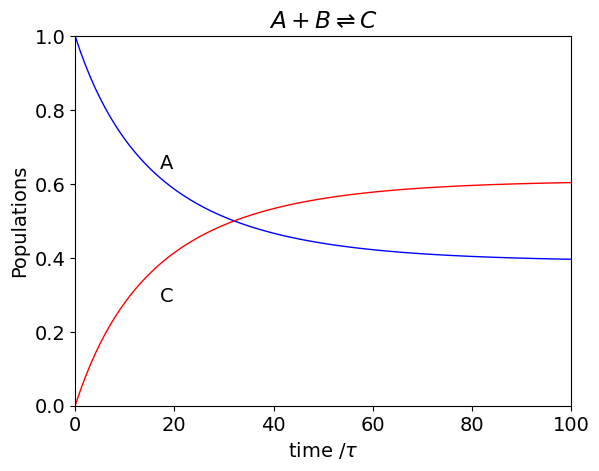

In [25]:
tau = 1e-9                 # set time to make rate constants into probabilities
k12 = 4e7*tau              # choose some rate constants
k21 = 1e7*tau              
p  = np.array([1,1,0])            # initial values of A and B, C=0

n = 100                           # number of points
t = np.linspace(0,n,n)            # time steps
A = np.zeros(n,dtype=float)       # array to hold calculated values
B = np.zeros(n,dtype=float)
C = np.zeros(n,dtype=float)
A[0] = p[0]                       # initial values
B[0] = p[1]
C[0] = p[2]

TT = np.array([[ 1 - k12*B[0], 0, k12*B[0]/2 ], [ 0, 1 - k12*A[0], k12*A[0]/2],[ k21, k21, 1 - k21] ] )  #  transfer matrix
T  = np.transpose(TT)

for i in range(1,n,1):
    temp = T @ p                  # @ is matrix multiply
    A[i] = temp[0]                # save values
    B[i] = temp[1]
    C[i] = temp[2]
    p = temp                      # ready for next step
    T[0,0] = 1 - k12*B[i]         # update T matrix; note T is already transposed
    T[2,0] = k12*B[i]/2
    T[1,1] = 1 - k12*A[i]
    T[2,1] = k12*A[i]/2
    pass

plt.plot(t, A, color='blue',linewidth=1)
plt.plot(t, C, color='red',linewidth=1)
plt.xlim([0,n])
plt.ylim([0,A[0]+C[0]])
plt.ylabel('Populations')
plt.xlabel('time /'+r'$\tau$')
plt.text(17, A[15],'A')
plt.text(17, C[10],'C')
plt.title(r'$A+B\rightleftharpoons C$')
plt.show()

As an aside, the analytic solution for this simple reaction has a difficult integration and can be determined starting with

$$\displaystyle \frac{dA}{dt}=-k_1AB+k_2C$$

where $A,B,C$ are used to represent the concentrations. If an amount $x$ reacts then $A=A_0-x, B=B_0-x, C=C_0+x$ making

$$\displaystyle \begin{align}\frac{dx}{dt}&=k_1(A_0-x)(B_0-x)+k_2(C_0+x)\\&=k_1A_0B_0-k_2C_0-k_1(A_0+B_0+k_2)x+k_1x^2\end{align}$$

On integrating this equation has the form

$$\displaystyle \int_0^x \frac{dx}{a+bx+cx^2}=\int_0^tdt$$

where $a,b,c$ are substituted for the terms in the rate equation and the solution is a standard one (Chapter 4-2.14)

$$\displaystyle \ln\left( \frac{2cx+b-\sqrt{q}}{2cx+b+\sqrt{q}} \right)-\ln\left( \frac{b-\sqrt{q}}{b+\sqrt{q}} \right)=t\sqrt{q}$$

where $q=b^2-4ac$. This can be simplified further using $\displaystyle w=\frac{b-\sqrt{q}}{2c},v=\frac{b+\sqrt{q}}{2c} $ and some rearranging to give,

$$\displaystyle x=\frac{vw\left(e^{\sqrt{q}t}-1\right)}{ v - we^{\sqrt{q}t} }$$

An alternative equation using the equilibrium amounts of $x$ is given by Wilkinson (1980), chapter 3, table 12 , agrees with these calculations.

## 13.5 Similarity Transforms

In our study of molecular group theory, similar matrices were introduced. However, _similar_ matrices are used more generally. A square matrix $\pmb{W}$ is described as being _similar or conjugate_ to another square matrix $\pmb{N}$, if there exists a third, non-singular, square matrix $\pmb{X}$ such that

$$\displaystyle \pmb{W} = \pmb{X}^{-1}\pmb{NX} \qquad\tag{42}$$

then $\pmb{X}^{-1}\pmb{NX}$ is a similarity transform; $\pmb{X}\pmb{NX}^{-1}$ is also a similarity transform. A similarity transform is equivalent to changing the basis set of one matrix into another basis; this might also be considered a coordinate transformation. 

If matrix $\pmb{W}$ operates on an object, this is the equivalent of transforming the object (which could be a rotation), then operating on it by $\pmb{N}$, which stretches or alters the object in some way (but does not rotate), then undoing the initial transformation with a further transformation (rotation in the opposite direction) with $\pmb{X}^{-1}$. Thus, $\pmb{W}$ performs the same operation as $\pmb{N}$ but uses a different set of axes.

The similarity transform is most useful in diagonalizing matrices, because, if a matrix $\pmb{W}$ can be diagonalized and its matrix of eigenvectors $\pmb{X}$ calculated, then $\pmb{W}$ is _similar_ to the diagonal matrix of its eigenvalues $\pmb{\Lambda}$, where the eigenvectors $\pmb{X}$ act as the similarity matrices. The diagonal matrix is

$$\displaystyle \pmb{\Lambda} =\begin{bmatrix} \lambda_1 & 0 & 0 &\cdots \\ 0 & \lambda_2   & 0 &\cdots  \\ 0 & 0 & \lambda_3 &\cdots \\ \vdots & \vdots &\vdots & \ddots   \end{bmatrix} $$

The equation relating eigenvalues and the diagonal matrix of eigenvectors $\pmb{\Lambda}$ is $\pmb{WX} = \pmb{X\Lambda}$. If we left multiply by the inverse eigenvector matrix $\pmb{X}^{-1}$ then

$$\displaystyle \pmb{X}^{-1}\pmb{WX} = \pmb{\Lambda} \qquad\tag{43}$$

which is a similarity transform. Of course, the inverse matrix $\pmb{X}^{-1}$ must exist. In making a diagonal matrix, the original matrix has been 'rotated', as it were, so that all elements are zero except on the diagonal, the off-diagonal elements become incorporated into the diagonal ones. This 'rotation' or coordinate change analogy, is what is done when the principal axis are found when the moments of inertia of a body are calculated, see Section 15.2.

In chemical kinetics, the diagonal matrix of the exponential values of the eigenvalues is used, i.e. eqn. 40,

$$\displaystyle [e^{\lambda t}] =\begin{bmatrix} e^{\lambda_1 t} & 0 & 0 & \cdots \\ 0 & e^{\lambda_2 t}   & 0 & \cdots \\ 0 & 0 & e^{\lambda_3 t} & \cdots \\ \vdots & \vdots &\vdots & \ddots \end{bmatrix}$$

therefore, we need to show that we can use the similarity transform to make this matrix. Suppose there is a function of a matrix $\pmb{f}(\pmb{W})$, which is itself a matrix, then this can be expanded as a (Taylor) series with coefficients $a_i$, just as is done with an exponential or other normal function. A general power series is written as

$$\displaystyle \pmb{f}(\pmb{W})= a_0\pmb{1}+a_1\pmb{W}+a_2\pmb{W}^2 +\cdots$$

Because $\pmb{f}(\pmb{W})$ must commute with $\pmb{W}$, then both matrices can be diagonalized simultaneously with a similarity transform. Using the eigenvector matrix $\pmb{X}$ of matrix $\pmb{W}$, then the similarity transform is

$$\displaystyle \pmb{X}^{-1}\pmb{f}(\pmb{W})\pmb{X} = \pmb{f}\pmb{\Lambda} \qquad\tag{44}$$

and $\pmb{f}(\pmb{\Lambda})$ is a diagonal matrix of function $f$. For instance, if $\pmb{f}(\pmb{W}) = e^{\pmb{W}}$, then

$$\displaystyle \pmb{X}^{-1}e^{\pmb{W}}\pmb{X} = e^{\pmb{\Lambda}}$$

which is used to solve equations in chemical kinetics.

### **(i) Raising matrices to a power**
Suppose that a matrix $\pmb{M}$ is to be raised to its $n^{th}$ power, the function $\pmb{f}(\pmb{W})$ is then $\pmb{M}^n$. The similarity transform becomes $\pmb{X}^{-1}\pmb{M}^n\pmb{X} = \pmb{\Lambda}^n$, which can be rearranged to $\pmb{M}^n=\pmb{X}\pmb{\Lambda}^n\pmb{X}^{-1} $ and so the equation can be used both ways round. This last expression is a very convenient way of raising a matrix to a large power, if $\pmb{M}$ can be diagonalized and its eigenvalues $\pmb{X}$ determined. The alternative method, is the repeated multiplication $\pmb{MMMM}\cdots$, which is impracticable should $n$ be large, $100$ for example.

To show that a similarity transform on $\pmb{M}$ produces a diagonal matrix of eigenvalues, consider the matrix

$$\displaystyle \pmb{M}=\begin{bmatrix} -2 & 10 \\ 2 & -3\end{bmatrix}$$

The eigenvalues are obtained using the secular determinant

$$\displaystyle \begin{bmatrix} -1-\lambda  & 10 \\ 2 & -3-\lambda \end{bmatrix}=0$$

and solving the characteristic equation, which is $(\lambda + 2)(\lambda + 3) - 20 = 0$. This produces
eigenvalues of $\lambda_1 = -7$ and $\lambda_2 = 2$. The eigenvectors are

$$\displaystyle \pmb{x}_1 =\begin{bmatrix}-2 \\1 \end{bmatrix} \qquad \pmb{x}_2 =\begin{bmatrix}5 \\2 \end{bmatrix}$$

The dot product of the eigenvectors is $-4$ so they are not orthogonal, which is expected as the matrix is not Hermitian. The (modal) matrix of eigenvector column vectors is

$$\displaystyle \pmb{x} =\begin{bmatrix}-2& 5 \\1&2 \end{bmatrix}$$

which has an inverse,

$$\displaystyle \pmb{x}^{-1} =\frac{1}{9}\begin{bmatrix}-2& 5 \\1&2 \end{bmatrix}$$

(The eigenvalues, eigenvectors, and inverse of any $2 \times 2$ matrix are given in Section 5.6.) The similarity transform is therefore

$$\displaystyle \pmb{\Lambda} =\pmb{x}^{-1}\pmb{Mx}=\frac{1}{9}\begin{bmatrix}-2& 5 \\1&2 \end{bmatrix}\begin{bmatrix} -2 & 10 \\ 2 & -3\end{bmatrix}\begin{bmatrix}-2& 5 \\1&2 \end{bmatrix} = \begin{bmatrix} -7 & 0 \\ 0 & 2\end{bmatrix}$$

and which proves equation 43 because the diagonal matrix of eigenvalues is obtained.

To raise $\pmb{M}$ to the $5^{th}$ power the calculation is $\pmb{M}^5 = \pmb{x\Lambda}^5\pmb{x}^{-1}$ or

$$\displaystyle \pmb{M}^5=\frac{1}{9}\begin{bmatrix}-2& 5 \\1&2 \end{bmatrix}\begin{bmatrix} -7 & 0 \\ 0 & 2\end{bmatrix}^5\begin{bmatrix}-2& 5 \\1&2 \end{bmatrix}= \begin{bmatrix}-7452 & 18710\\ 3472 & -9323\end{bmatrix}$$

In [33]:
M, Lambda = symbols('M, Lambda')
M  = Matrix([[-2,10],[2,-3]])
evecs,evals = M.diagonalize()
M, evecs, evals

⎛⎡-2  10⎤  ⎡-2  5⎤  ⎡-7  0⎤⎞
⎜⎢      ⎥, ⎢     ⎥, ⎢     ⎥⎟
⎝⎣2   -3⎦  ⎣1   2⎦  ⎣0   2⎦⎠

In [34]:
Lambda = evecs.inv()* M *evecs    # eigenvalues 
Lambda

⎡-7  0⎤
⎢     ⎥
⎣0   2⎦

In [35]:
M5 = evecs*Lambda**5*evecs.inv()  # M^5 
M5

⎡-7452  18710⎤
⎢            ⎥
⎣3742   -9323⎦

The same calculation can be done using numpy

In [36]:
m = np.array([[-2,10],[2,-3]])
evals,evects = LA.eig(m)              # get eigenvalues and eigenvectors
L = np.zeros((2,2),dtype=float)       # make new array Lambda 
for i in range(2):
    L[i,i]= evals[i]                  # make diagonal matrix of eigenvalues
m5 = evects @ L**5 @ LA.inv(evects)   # matrix m to 5 th power
m5

array([[-7452., 18710.],
       [ 3742., -9323.]])

## 13.6 A Similarity Transform used to evaluate a partition function.  The helix-coil transition
A polypeptide or a protein can change from a helix to a random coil structure or vice versa, over a small range of temperatures. This sudden change is suggestive of a cooperative process and Zimm and Bragg (1959) used a statistical model and calculated the partition function for a peptide chain consisting of two types of residues, either those that form a helix or those that do not. A section of protein will be described as having an unstructured coil if it has c type amino acids and h type if they are helix forming such as alanine. A portion of the chain could be $\cdots cchccchhhcchh\cdots$ . The statistical weight of a $\cdots ch$ boundary and of continuing to grow a helix $\cdots chhh$ once formed is calculated and this statistical weight is the Boltzmann contribution to the partition function or $e^{-\Delta G/k_BT}$, where $\Delta G$ is the change in free energy when the next residue is encountered along the chain. The model is successful despite the assumption of nearest neighbour interactions whereas a helix strictly involves interactions with residues that are not just nearest neighbours.

The model has the following rules.

**(a)**$\quad$ The energy of the randomly coiled chain is taken as the baseline energy and it has a value of zero and a given a statistical weight of $1$.

**(b)**$\quad$ A section of helix is energetically favourable as hydrogen bonds are formed. The statistical weight given to a helix forming residue is $s$, if the helix is already formed, i.e. this is the statistical weight to add an $h$ if the preceding residue is also $h$. This is sometimes called a helix continuation parameter.

**(c)**$\quad$ The first helix forming residue must be at a $\cdots ch$ boundary. There is an entropy term $\sigma$ due to restricting the rotational motion of the residue on forming a helix from a coil, making the statistical weight $s\sigma$. The value of $\sigma$ is always less than 1.

The results of the calculation show that there is cooperativity in the helix-coil transition. When $\sigma \ll 1$ it is hard to form a helix, but once formed it is energetically favourable to continue to add only $h$ residues and the helix-coil 'phase transition' is sharp. Conversely, when $\sigma \sim 1$ there is no cooperativity in the transition and it occurs over a relatively wide range of temperature, which effectively means a large range of $s$ because $s$ is the Boltzmann contribution $e^{-\Delta G/k_BT}$ to the partition function.

Zimm and Bragg (1959) presented a matrix method to calculate the partition function sum, and they showed that the equation $\pmb{A}_{n+1} = \pmb{MA}_n$ can be used where $\pmb{M}$ is a transition matrix and $\pmb{A}n$ is a column vector containing two terms, one for adding a $c$ residue and one for adding an $h$ residue. The transition matrix represents the statistical weight of adding the next residue but also takes into account the weights of all the preceding ones. This matrix equation is

$$\displaystyle \begin{bmatrix}A^c_{n+1}\\A^h_{n+1} \end{bmatrix}=\begin{bmatrix}1 & 1\\s\sigma & s \end{bmatrix}\begin{bmatrix}A^c_{n}\\A^h_{n} \end{bmatrix}$$

which can be split into two equations $A^c_{n+1} = A_n^h + A_n^c$ and $A_n^h = s\sigma A_n^c + sA_n^h$ and, written this way, the weights of the preceding residues is made clear. 

If $N$ residues are considered, the transition equation becomes

$$\displaystyle \begin{bmatrix}A^c_{n+1}\\A^h_{n+1} \end{bmatrix}=\begin{bmatrix}1 & 1\\s\sigma & s \end{bmatrix}^N\begin{bmatrix}A^c_0\\A^h_0 \end{bmatrix}$$

where $A^h_0$ and $A^c_0$ is the initial state of the protein. If this is a single c residue then the equation is

$$\displaystyle \begin{bmatrix}A^c_{n+1}\\A^h_{n+1} \end{bmatrix}=\begin{bmatrix}1 & 1\\s\sigma & s \end{bmatrix}^N\begin{bmatrix}1\\0 \end{bmatrix}=\pmb{M}^N\begin{bmatrix}1\\0 \end{bmatrix}$$

The partition function is the _sum_ of the two parts $A^h$ and $A^c$ and can be formed by left-multiplying by a unit row vector,

$$\displaystyle \pmb{Z}=\begin{bmatrix}1 & 1 \end{bmatrix} \pmb{M}^N \begin{bmatrix} 0\\1 \end{bmatrix} $$

To complete the calculation the statistical weight matrix has to be solved using a similarity transform. The eigenvalues $\lambda_{1,2}$  are found by expanding the determinant of $\pmb{M}$ in the usual way, and are the solution to the characteristic equation $(1 - \lambda)(s - \lambda) - s\sigma = 0$ which are

$$\displaystyle \lambda_{1,2}= \frac{s-1\pm\sqrt{ (1-s)^2+4s\sigma } }{2} $$

The eigenvector modal matrix is 

$$\displaystyle \pmb{X}=\begin{bmatrix}\displaystyle \frac{1}{\lambda_1-1} &\displaystyle\frac{1}{\lambda_2-1}\\ 1& 1 \end{bmatrix} $$

and its inverse

$$\displaystyle \pmb{X}^{-1}=\frac{1}{\lambda_1-\lambda_2}\begin{bmatrix} -(\lambda_1-1)(\lambda_2-1) & \lambda_1-1&\\ (\lambda_1-1)(\lambda_2-1)& 1-\lambda_2 \end{bmatrix} $$

The matrix is raised to the power $N$  and $Z=\begin{bmatrix}1 & 1\end{bmatrix} M^N\begin{bmatrix}1\\0 \end{bmatrix}$ completes the calculation. 

$$\displaystyle Z=\frac{\lambda_1^{N+1}(1-\lambda_2)+\lambda_2^{N+1}(\lambda_1-1)}{\lambda_1-\lambda_2}$$

The average number of helical residues can be calculated with 

$$\displaystyle \langle h \rangle = \frac{s}{Z}\frac{dZ}{ds}$$

assuming $\sigma$  and $N$ are constant, and the number of helical stretches with 

$$\displaystyle \langle \sigma\rangle =\frac{\sigma}{Z}\frac{dZ}{d\sigma}$$

at constant $s$ and $N$. Typical values of $s = 0 \to 3$ and of $\sigma=10^{-3} \to 1/2$. $N$ can range from $10 \to 1000$. For further details, see Daune (1999) or Jackson (2006).

The steps are given in the next python/Sympy calculation.

In [37]:
s, sigma, lambda1, lambda2, N = symbols('s, sigma, lambda1, lambda2, N')

M = Matrix( [ [1,1], [s*sigma,s] ] )
evecs,evals  = M.diagonalize()
evecs,evals

⎛                                                                          ⎡  
⎜                                                                          ⎢  
⎜⎡        ______________________              ______________________    ⎤  ⎢s 
⎜⎢       ╱  2                                ╱  2                       ⎥  ⎢─ 
⎜⎢-s - ╲╱  s  + 4⋅s⋅σ - 2⋅s + 1  + 1  -s + ╲╱  s  + 4⋅s⋅σ - 2⋅s + 1  + 1⎥  ⎢2 
⎜⎢──────────────────────────────────  ──────────────────────────────────⎥, ⎢  
⎜⎢              2⋅s⋅σ                               2⋅s⋅σ               ⎥  ⎢  
⎜⎢                                                                      ⎥  ⎢  
⎜⎣                1                                   1                 ⎦  ⎢  
⎜                                                                          ⎢  
⎝                                                                          ⎣  

     ______________________                                       ⎤⎞
    ╱  2                                                     

Substituting for the eigenvalues and simplifying these matrices gives,

In [38]:
Lambda =   Matrix( [ [lambda1,0], [0,lambda2] ] ) 
X = Matrix( [ [1/(lambda1-1), 1/(lambda2-1)], [1,1] ])  # X matrix, and its inverse 
X

⎡  1       1   ⎤
⎢──────  ──────⎥
⎢λ₁ - 1  λ₂ - 1⎥
⎢              ⎥
⎣  1       1   ⎦

In [39]:
# X.inv()    # invert matrix, remove hash to see this

In [40]:
MN = X * Lambda**N* X.inv()   # raised to Nth power
simplify(MN)

⎡                  N     N        N     N                           N     N   
⎢             λ₁⋅λ₂  - λ₁ ⋅λ₂ + λ₁  - λ₂                          λ₁  - λ₂    
⎢             ───────────────────────────                         ─────────   
⎢                       λ₁ - λ₂                                    λ₁ - λ₂    
⎢                                                                             
⎢  N                            N                          N              N   
⎢λ₁ ⋅(-λ₁⋅λ₂ + λ₁ + λ₂ - 1) + λ₂ ⋅(λ₁⋅λ₂ - λ₁ - λ₂ + 1)  λ₁ ⋅(λ₁ - 1) + λ₂ ⋅(1
⎢──────────────────────────────────────────────────────  ─────────────────────
⎣                       λ₁ - λ₂                                    λ₁ - λ₂    

      ⎤
      ⎥
      ⎥
      ⎥
      ⎥
      ⎥
 - λ₂)⎥
──────⎥
      ⎦

In [41]:
Z = Matrix([[1,1]])*MN*Matrix([[1],[0]])
simplify(Z)

⎡     N + 1     N + 1        N + 1     N + 1⎤
⎢λ₁⋅λ₂      - λ₁     ⋅λ₂ + λ₁      - λ₂     ⎥
⎢───────────────────────────────────────────⎥
⎣                  λ₁ - λ₂                  ⎦